# Purpose
研究婚外情的數據

(1) 該位外遇的可能性有多大？ 
(2) 影響外遇的原因是什麼？ 
(3) 可以根據分析結果說明如何降低外遇的發生嗎？

# 數據說明

* 婚外情數據即著名的“Fair’s Affairs”，取自於1969年《今日心理》（Psychology Today）所做的一個代表性調查
* 該數據從601個參與者身上收集了9個變量
* 變數包括一年來婚外情的頻率以及參與者性別、年齡、婚齡、是否有小孩、宗教信仰程度、學歷、職業，還有對婚姻的自我評分

#### affairs 受訪者在過去一年中進行外遇的頻率         
0 = 無         
1 = 一次       
2 = 兩次         
3 = 三倍         
7 = 4 - 10 次         
12 = 每月或更多         

#### gender          
0 = 女性         
1 = 男性         

#### age         
17.5 = 20 歲以下         
22.0 = 20 - 24         
27.0 = 25 - 29         
32.0 = 30 - 34         
37.0 = 35 - 39         
42.0 = 40 - 44         
47.0 = 45 - 49         
52.0 = 50 - 54         
57.0 = 55 或以上         

#### yearsmarried  婚姻時間                  
0.125 = 3 個月或更短         
0.417 = 4 - 6 個月         
0.750 = 6 個月 - 1 年         
1.500 = 1 - 2 年         
4.000 = 3 - 5 年         
7.000 = 6 - 8 年         
10.00 = 9 - 11 年         
15.00 = 12 年或更長時間         

#### children 孩子人數                  
0 = 無         
1 = 一個或多個         
         
#### religiousness 婚內的宗教信仰         
1 = 反宗教         
2 = 完全沒有         
3 = 輕微         
4 = 有點         
5 = 非常         

#### education 教育程度         
9.0 = 小學         
12.0 = 高中畢業         
14.0 = 一些大學         
16.0 = 大學畢業生         
17.0 = 一些畢業作品         
18.0 = 碩士學位         
20.0 = 博士、醫學博士或其他高級學位 

#### occupation 詳見data-descriptions.pdf

#### rating 對婚姻的自我評分 (5分制，1表示非常不幸福，5表示非常幸福）         

# 1. import data

In [285]:
import numpy as np
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.ticker as mtick
import seaborn as sns # For creating plots
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [229]:
df = pd.read_csv('Affairs.csv')
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3


### <span style="color:#3498DB">Point: 請先將affairs變數轉為二值型因子'ynaffair'，外遇0次為0，外遇一次以上為1</span>

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   affairs        601 non-null    int64  
 1   gender         601 non-null    object 
 2   age            601 non-null    float64
 3   yearsmarried   601 non-null    float64
 4   children       601 non-null    object 
 5   religiousness  601 non-null    int64  
 6   education      601 non-null    int64  
 7   occupation     601 non-null    int64  
 8   rating         601 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 42.4+ KB


In [231]:
df['yaffairs'] = df['affairs']
df['yaffairs'] = df['yaffairs'].apply(lambda x: 0 if x == 0 else 1)
df = df.drop('affairs', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         601 non-null    object 
 1   age            601 non-null    float64
 2   yearsmarried   601 non-null    float64
 3   children       601 non-null    object 
 4   religiousness  601 non-null    int64  
 5   education      601 non-null    int64  
 6   occupation     601 non-null    int64  
 7   rating         601 non-null    int64  
 8   yaffairs       601 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 42.4+ KB


In [232]:
df.describe()

,age,yearsmarried,religiousness,education,occupation,rating,yaffairs
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780,0.249584
std,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179,0.433133
min,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000,0.000000
50%,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000,0.000000
75%,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000,0.000000
max,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000,1.000000


In [233]:
df[['yearsmarried', 'age', 'rating', 'yaffairs']].groupby(['yearsmarried'], as_index=True).mean()[['age', 'rating', 'yaffairs']]

,age,rating,yaffairs
yearsmarried,,,
0.125,25.181818,4.363636,0.090909
0.417,24.500000,4.400000,0.100000
0.750,22.709677,4.258065,0.096774
1.500,24.505682,4.318182,0.136364
4.000,27.333333,4.161905,0.257143
7.000,29.500000,3.695122,0.280488
10.000,32.292857,4.057143,0.300000
15.000,42.122549,3.602941,0.303922


In [234]:
df.pivot_table(index=['gender', 'yearsmarried'], values=['age', 'rating'], 
margins=True, aggfunc=['mean'], margins_name= 'mean')


mean          
                           age    rating
gender yearsmarried                     
female 0.125         22.000000  4.600000
       0.417         22.000000  4.666667
       0.75          22.333333  4.380952
       1.5           23.415094  4.396226
       4.0           25.902439  4.146341
       7.0           28.122449  3.693878
       10.0          30.625000  4.277778
       15.0          40.461538  3.461538
male   0.125         27.833333  4.166667
       0.417         28.250000  4.000000
       0.75          23.500000  4.000000
       1.5           26.157143  4.200000
       4.0           28.250000  4.171875
       7.0           31.545455  3.696970
       10.0          34.058824  3.823529
       15.0          43.850000  3.750000
mean                 32.487521  3.931780

In [235]:
df.isnull().sum()

gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
yaffairs         0
dtype: int64

In [236]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,age,yearsmarried,religiousness,education,occupation,rating,yaffairs,gender_female,gender_male,children_no,children_yes
0,37.0,10.00,3,18,7,4,0,False,True,True,False
1,27.0,4.00,4,14,6,4,0,True,False,True,False
2,32.0,15.00,1,12,1,4,0,True,False,False,True
3,57.0,15.00,5,18,6,5,0,False,True,False,True
4,22.0,0.75,2,17,6,3,0,False,True,True,False


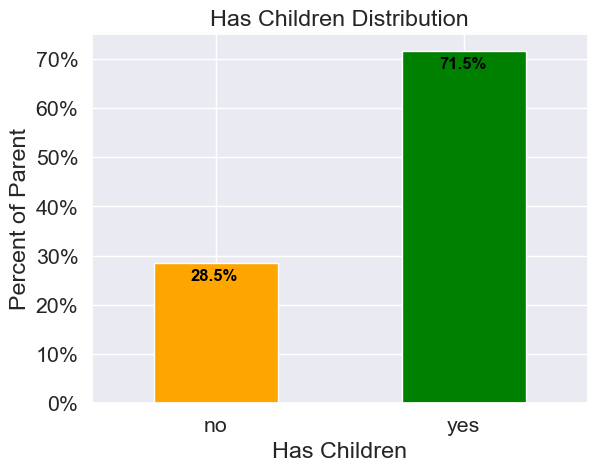

In [237]:
colors = ['orange','green']
ax = (df['children'].value_counts().sort_index()*100.0 /len(df)).plot(kind='bar',stacked = True, rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Percent of Parent')
ax.set_xlabel('Has Children')
ax.set_title('Has Children Distribution')

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round(i.get_height(), 1))+'%',
            fontsize=12,
            color='black',
           weight = 'bold')

Text(0.5, 1.0, '% of Affair')

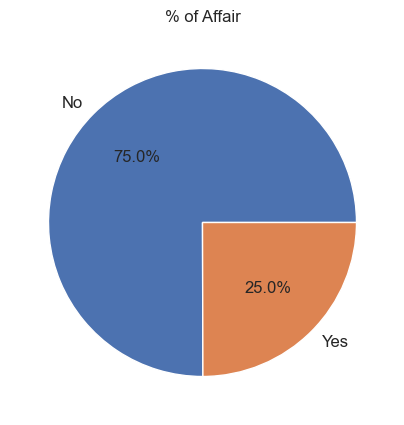

In [238]:
ax = (df['yaffairs'].map({0:'No', 1:'Yes'}).value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
                                                                         
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('',fontsize = 12)
ax.set_title('% of Affair', fontsize = 12)

Text(0.5, 1.0, 'age')

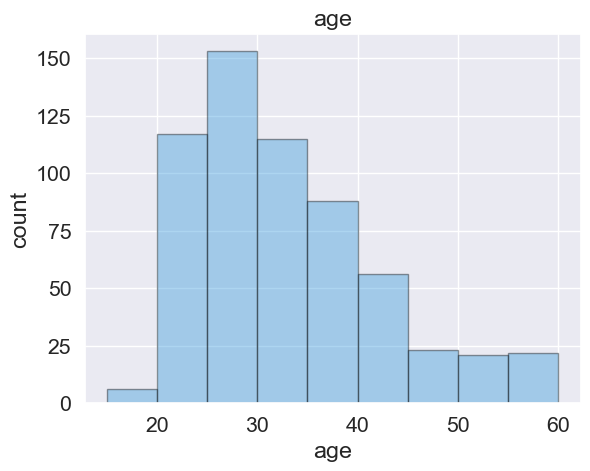

In [239]:
# 一般是處理連續型資料，這邊都分好組了沒有很適合 
ax = sns.distplot(df['age'], 
                  hist=True, 
                  kde=False, 
                  bins=range(15, int(df['age'].max(skipna=True)) + 5, 5), 
                  color = '#3498DB', 
                  hist_kws={'edgecolor':'black'},
                #   kde_kws={'linewidth': 4}
                  )
ax.set_ylabel('count')
ax.set_xlabel('age')
ax.set_title('age')

Text(0.5, 1.0, 'rating distribution')

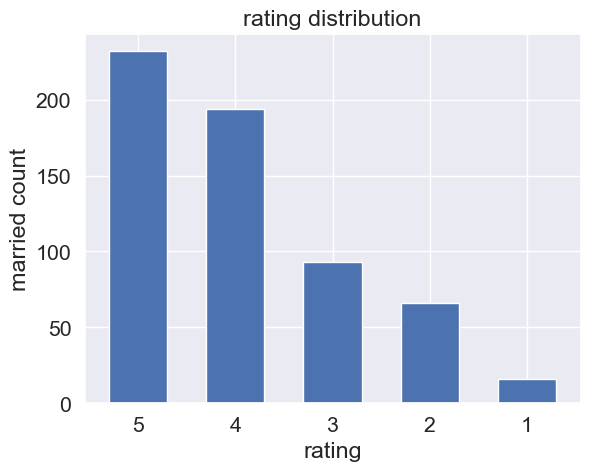

In [240]:
ax = df['rating'].value_counts().plot(kind = 'bar',rot = 0, width = 0.6)
ax.set_ylabel('married count')
ax.set_title('rating distribution')

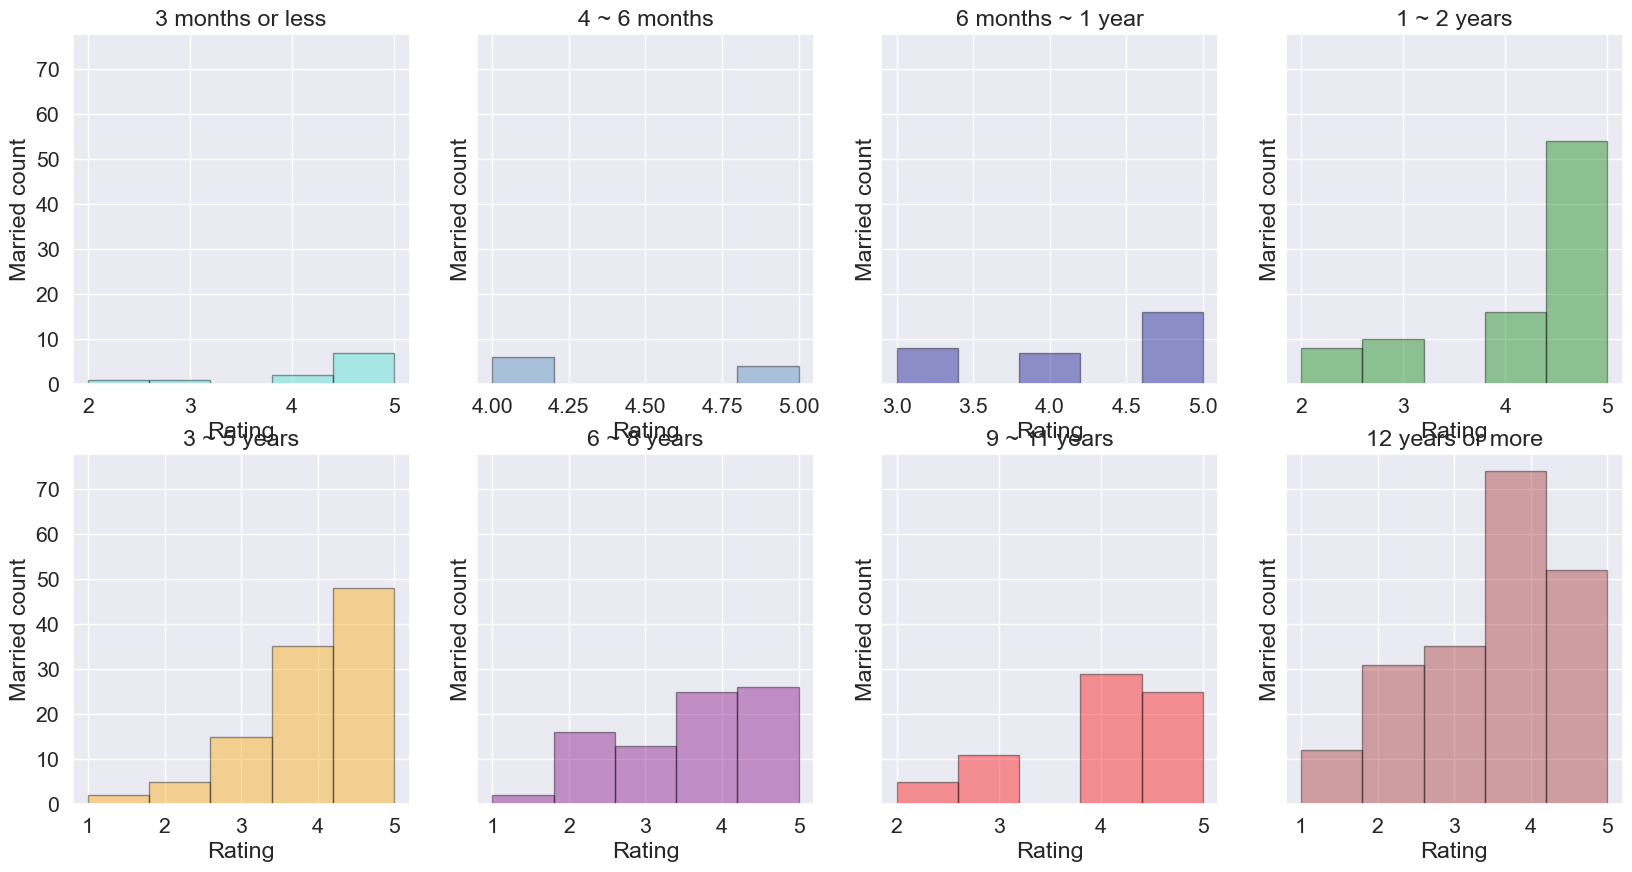

In [241]:
fig, axes = plt.subplots(nrows=2, ncols=4, sharey=True, figsize=(20, 10))

# 展開 axes 成為一維陣列，方便迴圈操作
axes = axes.flatten()

years_married = [0.125, 0.417, 0.75, 1.5, 4, 7, 10, 15]
titles = [
    '3 months or less', '4 ~ 6 months', '6 months ~ 1 year',
    '1 ~ 2 years', '3 ~ 5 years', '6 ~ 8 years',
    '9 ~ 11 years', '12 years or more'
]
colors = ['turquoise', 'steelblue', 'darkblue', 'green', 
          'orange', 'purple', 'red', 'brown']

for i, (year, title, color) in enumerate(zip(years_married, titles, colors)):
    sns.distplot(df[df['yearsmarried'] == year]['rating'],
                 hist=True, kde=False,
                 bins=5, color=color,
                 hist_kws={'edgecolor': 'black'},
                 kde_kws={'linewidth': 4},
                 ax=axes[i])
    axes[i].set_ylabel('Married count')
    axes[i].set_xlabel('Rating')
    axes[i].set_title(title)


<Axes: xlabel='yaffairs', ylabel='rating'>

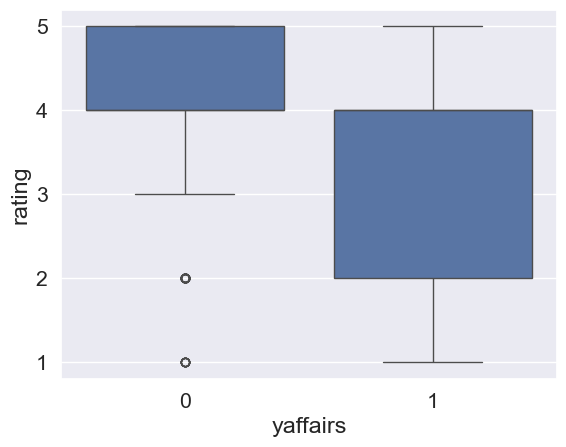

In [242]:
sns.boxplot(x = df.yaffairs, y = df.rating)

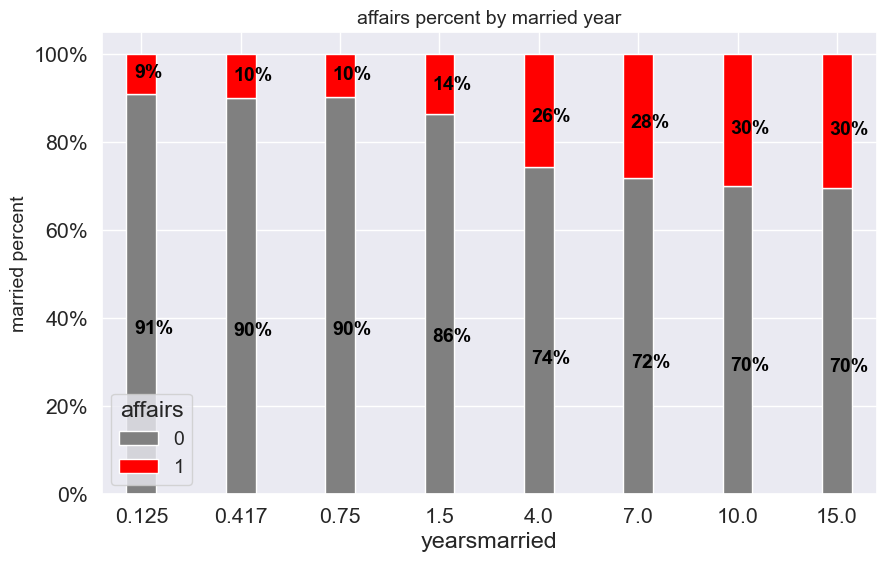

In [243]:
colors = ['gray','red']
contract_churn = df.groupby(['yearsmarried','yaffairs']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, rot = 0, figsize = (10,6), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'affairs')
ax.set_ylabel('married percent',size = 14)
ax.set_title('affairs percent by married year',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'black',
                weight = 'bold',
                size = 14)

Text(0.5, 1.0, 'Distribution of yearsmarried by affairs')

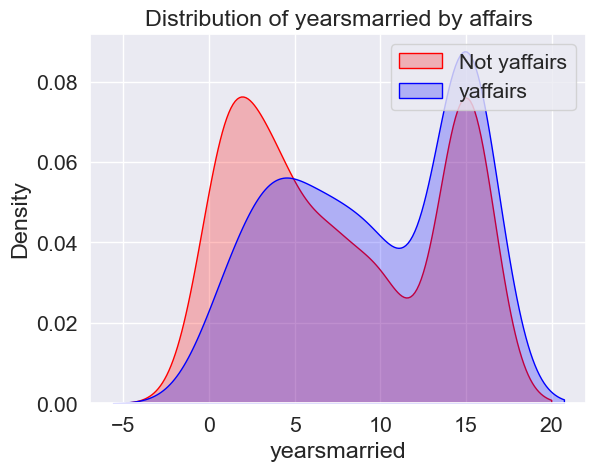

In [244]:
ax = sns.kdeplot(df.yearsmarried[(df["yaffairs"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.yearsmarried[(df["yaffairs"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not yaffairs","yaffairs"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('yearsmarried')
ax.set_title('Distribution of yearsmarried by affairs')

In [245]:
X = df_dummies.drop(columns = ['yaffairs'])
y = df_dummies['yaffairs'].values

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

## Logistic Regression

In [246]:
model_log = LogisticRegression()
result = model_log.fit(X_train, y_train)

y_test_pred_log = model_log.predict(X_test)

print (metrics.accuracy_score(y_test, y_test_pred_log))

0.7520661157024794


In [247]:
model_log.predict_proba(X_test)

array([[0.89899363, 0.10100637],
       [0.78837737, 0.21162263],
       [0.81699249, 0.18300751],
       [0.64137515, 0.35862485],
       [0.67407129, 0.32592871],
       [0.81449875, 0.18550125],
       [0.51453613, 0.48546387],
       [0.46165878, 0.53834122],
       [0.56454358, 0.43545642],
       [0.85920529, 0.14079471],
       [0.77228569, 0.22771431],
       [0.78525291, 0.21474709],
       [0.62388401, 0.37611599],
       [0.71191837, 0.28808163],
       [0.86201029, 0.13798971],
       [0.74903306, 0.25096694],
       [0.56298716, 0.43701284],
       [0.90243086, 0.09756914],
       [0.32931722, 0.67068278],
       [0.9264405 , 0.0735595 ],
       [0.89427383, 0.10572617],
       [0.57598596, 0.42401404],
       [0.6519392 , 0.3480608 ],
       [0.78249552, 0.21750448],
       [0.8822195 , 0.1177805 ],
       [0.6303502 , 0.3696498 ],
       [0.72230303, 0.27769697],
       [0.91917216, 0.08082784],
       [0.65988804, 0.34011196],
       [0.72105135, 0.27894865],
       [0.

Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

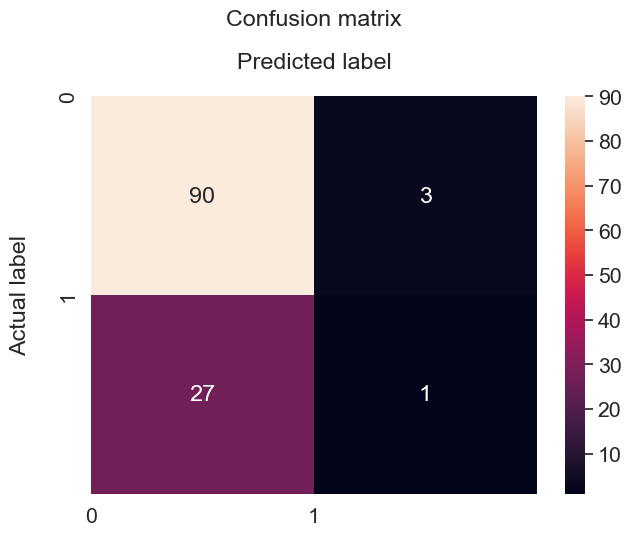

In [248]:
cm = confusion_matrix(y_test, y_test_pred_log) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [249]:
TN = 90
FN = 27
FP = 3
TP = 1

print(f'Accuracy : {round((TP + TN)/(TP + FP + FN + TN),3)}')
print(f'Precision : {round((TP)/(TP + FP), 3)}')
print(f'Recall/Sensitivity : {round((TP)/(TP + FN), 3)}')
print(f'Specificity : {round((TN)/(TN + FP), 3)}')

Accuracy : 0.752
Precision : 0.25
Recall/Sensitivity : 0.036
Specificity : 0.968


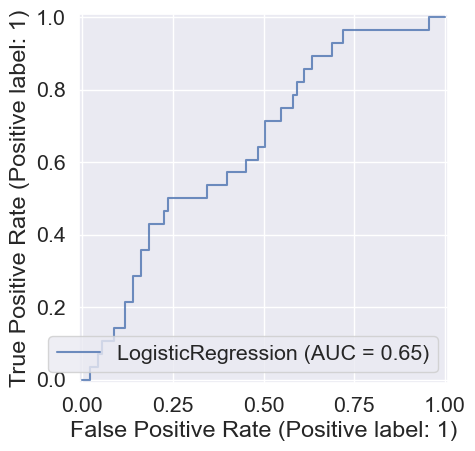

In [250]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

Axes(0.125,0.11;0.775x0.77)


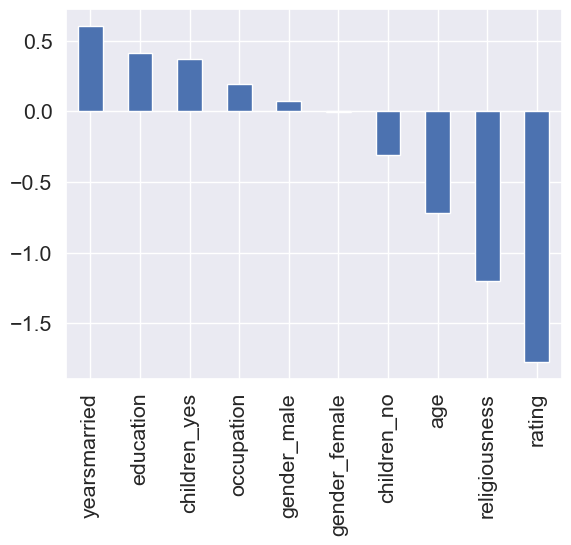

In [251]:
weights = pd.Series(model_log.coef_[0], index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

## Support Vecor Machine (SVM)

In [252]:
model_svm = SVC(kernel='rbf')
model_svm.fit(X_train,y_train)
y_test_pred_svm = model_svm.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_svm)

0.768595041322314

Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

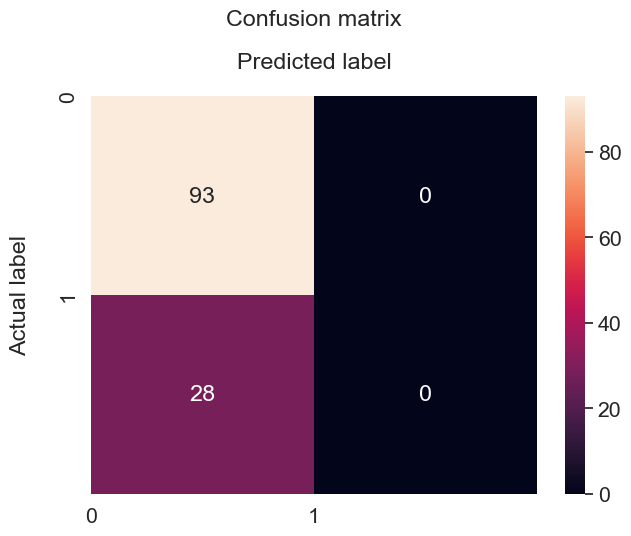

In [253]:
# Create the Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_svm) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [254]:
TN = 93
FN = 28
FP = 0
TP = 0

print(f'Accuracy : {round((TP + TN)/(TP + FP + FN + TN),3)}')
# print(f'Precision : {round((TP)/(TP + FP), 3)}')
print(f'Recall/Sensitivity : {round((TP)/(TP + FN), 3)}')
print(f'Specificity : {round((TN)/(TN + FP), 3)}')

Accuracy : 0.769
Recall/Sensitivity : 0.0
Specificity : 1.0


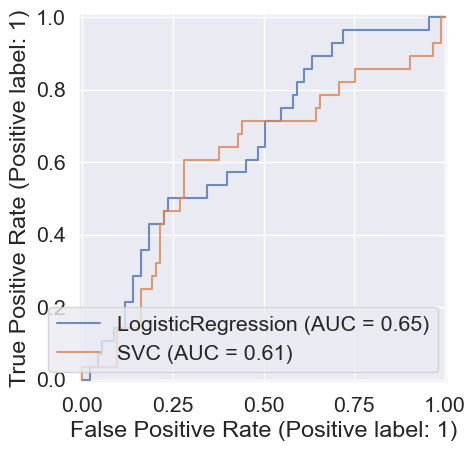

In [255]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
svm_disp = RocCurveDisplay.from_estimator(model_svm, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [256]:
preprocessor = make_pipeline(SelectKBest(f_classif, k=7))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))

hyper_params_svm = {'svc__gamma':[0.001, 0.0001, 0.0005], 'svc__C':[1, 10, 100, 1000, 3000, 5000],}

main = RandomizedSearchCV(SVM, hyper_params_svm, scoring='recall', n_iter=5)
main.fit(X_train, y_train)
print(main.best_params_)

{'svc__gamma': 0.001, 'svc__C': 3000}


In [257]:
grid_svm = GridSearchCV(SVM, hyper_params_svm,scoring='recall', cv=3)
grid_svm.fit(X_train, y_train)
y_test_pred_gridsvm = grid_svm.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_gridsvm)

0.7355371900826446

Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

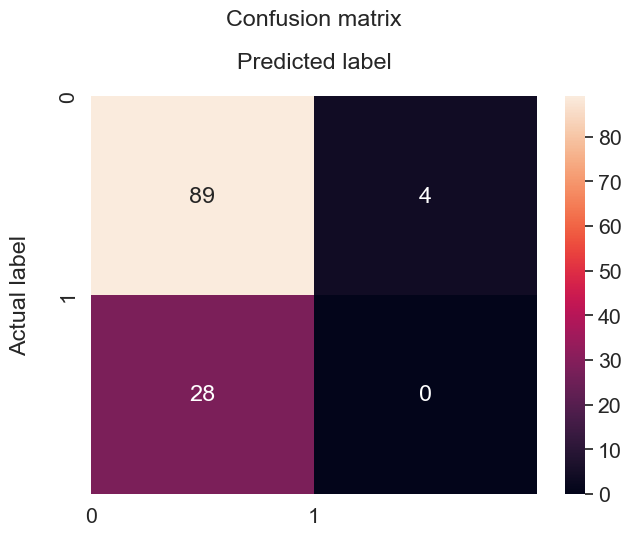

In [258]:
cm = confusion_matrix(y_test, y_test_pred_gridsvm) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [266]:
TN = 89
FN = 28
FP = 4
TP = 0

print(f'Accuracy : {round((TP + TN)/(TP + FP + FN + TN),3)}')
print(f'Precision : {round((TP)/(TP + FP), 3)}')
print(f'Recall/Sensitivity : {round((TP)/(TP + FN), 3)}')
print(f'Specificity : {round((TN)/(TN + FP), 3)}')

Accuracy : 0.736
Precision : 0.0
Recall/Sensitivity : 0.0
Specificity : 0.957


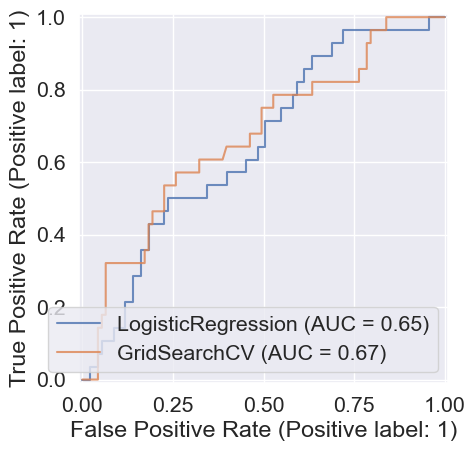

In [260]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
grid_svm_disp = RocCurveDisplay.from_estimator(grid_svm, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

## Decision Tree

In [261]:
model_dt = DecisionTreeClassifier(criterion = 'gini')
clf = model_dt.fit(X_train, y_train)

y_test_pred_dt = model_dt.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred_dt))

0.6694214876033058


Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

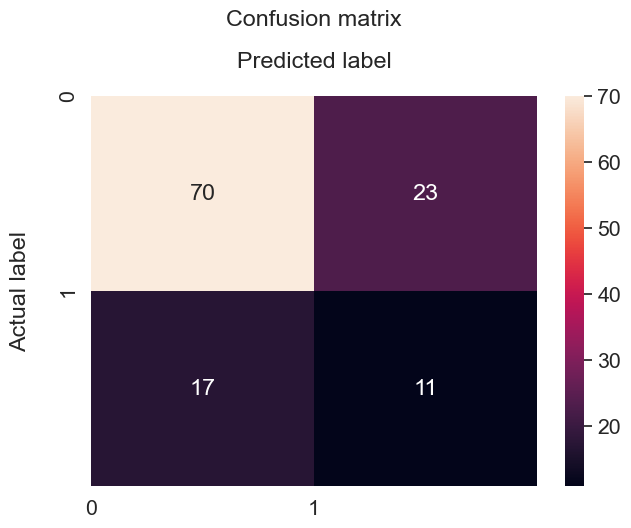

In [262]:
cm = confusion_matrix(y_test, y_test_pred_dt) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [267]:
TN = 70
FN = 17
FP = 23
TP = 11

print(f'Accuracy : {round((TP + TN)/(TP + FP + FN + TN),3)}')
print(f'Precision : {round((TP)/(TP + FP), 3)}')
print(f'Recall/Sensitivity : {round((TP)/(TP + FN), 3)}')
print(f'Specificity : {round((TN)/(TN + FP), 3)}')

Accuracy : 0.669
Precision : 0.324
Recall/Sensitivity : 0.393
Specificity : 0.753


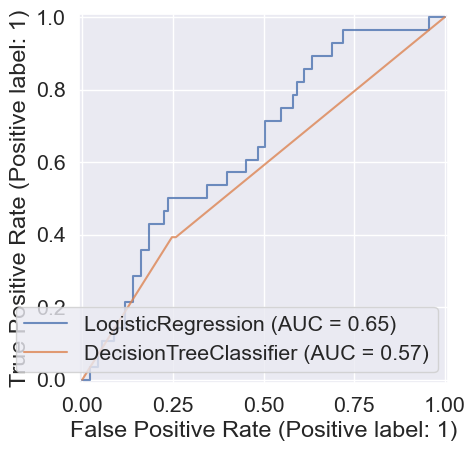

In [277]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
decision_tree_disp = RocCurveDisplay.from_estimator(model_dt, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

### Decision Tree Optimization - Pruninga

In [268]:
preprocessor = make_pipeline(SelectKBest(f_classif, k=7))
DecisionTree = make_pipeline(preprocessor,DecisionTreeClassifier(random_state=0))
DecisionTree.get_params().keys()
hyper_params_dt = {
    'decisiontreeclassifier__max_leaf_nodes':[10,20,30],
    'decisiontreeclassifier__min_samples_leaf': [5,10,15],
    'decisiontreeclassifier__max_depth': [5,10,15]
}
grid_dt = GridSearchCV(DecisionTree, hyper_params_dt, scoring='recall', cv=3)
grid_dt.fit(X_train, y_train)
print(grid_dt.best_params_)
y_test_pred_griddt = grid_dt.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_griddt)

{'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__max_leaf_nodes': 10, 'decisiontreeclassifier__min_samples_leaf': 5}


0.7603305785123967

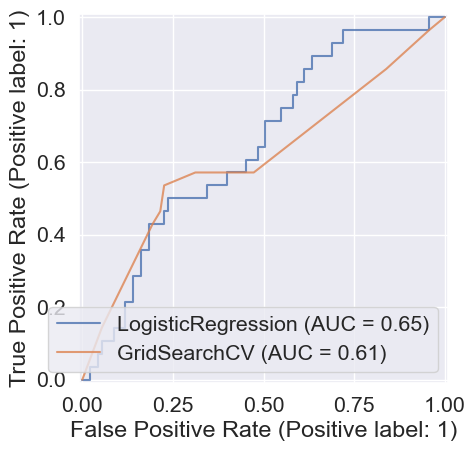

In [278]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
grid_search_disp = RocCurveDisplay.from_estimator(grid_dt, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

## Random Forest

In [273]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Make predictions
y_test_pred_rf = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred_rf))

0.7107438016528925


Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

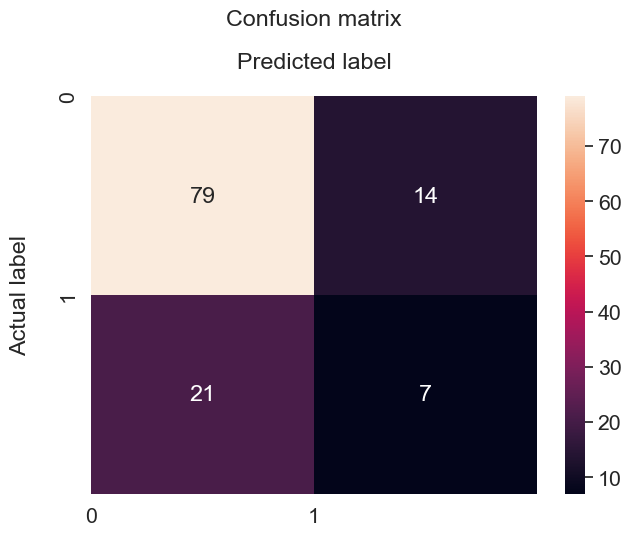

In [274]:
# Create the Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_rf) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [275]:
TN = 79
FN = 21
FP = 14
TP = 7

print(f'Accuracy : {round((TP + TN)/(TP + FP + FN + TN),3)}')
print(f'Precision : {round((TP)/(TP + FP), 3)}')
print(f'Recall/Sensitivity : {round((TP)/(TP + FN), 3)}')
print(f'Specificity : {round((TN)/(TN + FP), 3)}')

Accuracy : 0.711
Precision : 0.333
Recall/Sensitivity : 0.25
Specificity : 0.849


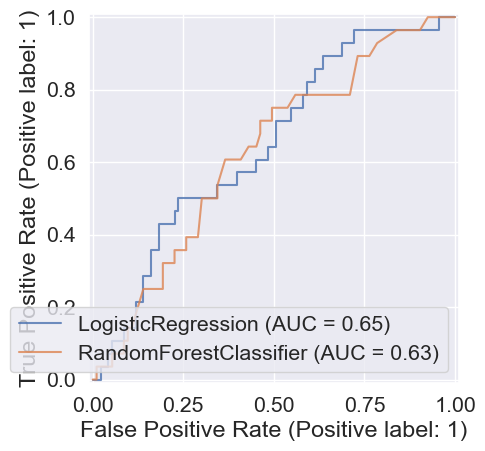

In [279]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
random_forest_disp = RocCurveDisplay.from_estimator(model_rf, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

<Axes: >

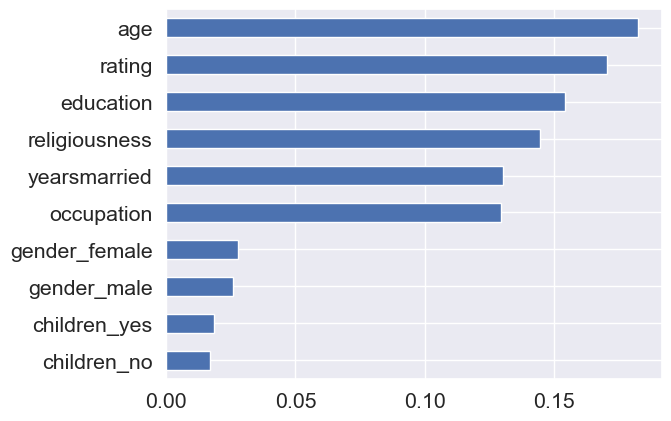

In [280]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

### Random Forest Optimization

In [281]:
preprocessor = make_pipeline(SelectKBest(f_classif, k=7))
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
RandomForest.get_params().keys()
hyper_params_rf = {"randomforestclassifier__n_estimators":[10,50,100,150,200],
                   "randomforestclassifier__max_depth":[5,10,15,20],
                   "randomforestclassifier__max_leaf_nodes":[10,20,30]}
grid_rf = GridSearchCV(RandomForest, hyper_params_rf, scoring='recall', cv=3)
grid_rf.fit(X_train, y_train)
print(grid_rf.best_params_)
y_test_pred_gridrf = grid_rf.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_gridrf)

{'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_leaf_nodes': 30, 'randomforestclassifier__n_estimators': 10}


0.7851239669421488

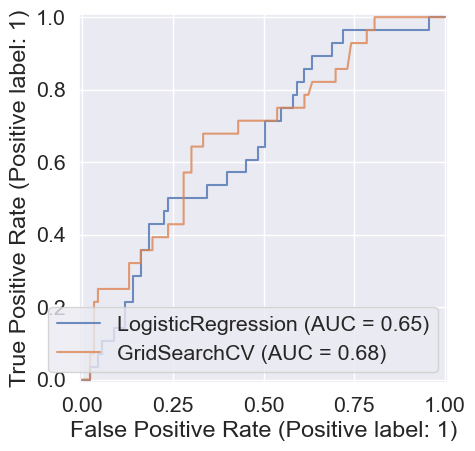

In [282]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
grid_rf_disp = RocCurveDisplay.from_estimator(grid_rf, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

## XgBoost

In [286]:
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)
y_test_pred_xg = model_xg.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_xg)

0.7024793388429752

Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

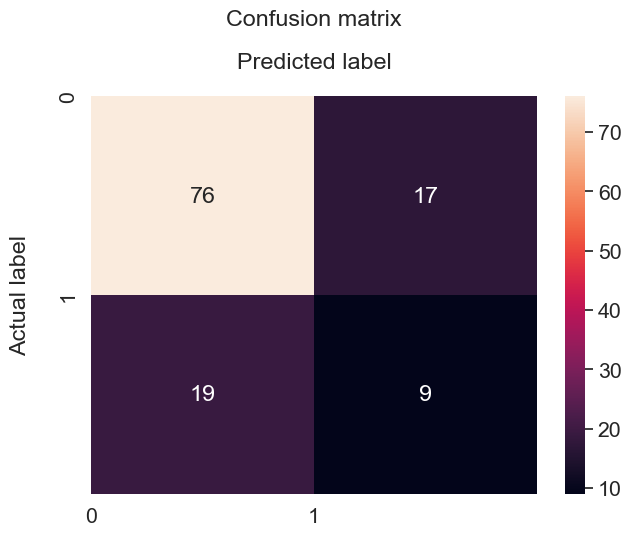

In [287]:
# Create the Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_xg) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [288]:
TN = 76
FN = 19
FP = 17
TP = 9

print(f'Accuracy : {round((TP + TN)/(TP + FP + FN + TN),3)}')
print(f'Precision : {round((TP)/(TP + FP), 3)}')
print(f'Recall/Sensitivity : {round((TP)/(TP + FN), 3)}')
print(f'Specificity : {round((TN)/(TN + FP), 3)}')

Accuracy : 0.702
Precision : 0.346
Recall/Sensitivity : 0.321
Specificity : 0.817


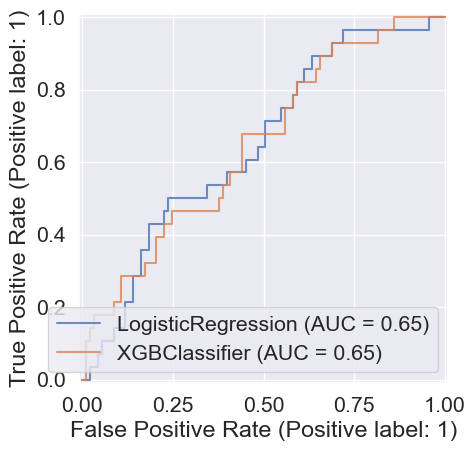

In [289]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
model_xg_disp = RocCurveDisplay.from_estimator(model_xg, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

## 這是一個較不平衡的分類，TP、FP大多偏低，甚至有 0 的。此情況下決策樹、XGBoost表現較好。